## Analyse stylométrique de Tertullien : approche par le NLP

### Installation et importation des librairies

In [165]:
%%capture capt
#Nous aurons besoin de la dernière version de Numpy.
!pip install --upgrade numpy Interval
#On utilisera la librairie cltk (classical language toolkit) qui fait référence en NLP pour Python et pour les langues classiques
!pip install cltk
#Elle nous permettra de faire de beaux wordcloud.
!pip install wordcloud
#On utilisera la librairie cltk (natural language toolkit) qui fait référence en NLP pour Python et pour les langues contemporaines
!pip install nltk
!pip install pyLDAvis 
#Nous ferons aussi des modèles prédictifs : on utilisera Scikit-Learn.
!pip install --upgrade scikit-learn

In [166]:
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import string
import re

### Nettoyage de notre texte

In [168]:
# En prévision de la suppression des stop-words, on importe une liste élaborée au préalable.
with open('StopwordsLatin.txt', 'r') as stop_words_file:
    stop_words = stop_words_file.read().splitlines()

## Import CSV

In [169]:
#On ouvre le fichier CSV avec la boîte à outils "Pandas" en précisant le séparateur.
CSV=pd.read_csv('Corpus.csv', sep=',')
#On affiche les premières valeurs du dataframe.
CSV.head()

,form,lemma,POS,morph
0,Varie,uarie,ADV,Deg=Pos
1,diabolus,diabolus,NOMcom,Case=Nom|Numb=Sing
2,aemulatus,aemulor,VER,Case=Nom|Numb=Sing|Gend=Masc|Mood=Par|Tense=Pe...
3,est,sum1,VER,Numb=Sing|Mood=Ind|Tense=Pres|Voice=Act|Person=3
4,veritatem,ueritas,NOMcom,Case=Acc|Numb=Sing


In [145]:
CSV

,form,lemma,POS,morph
0,Varie,uarie,ADV,Deg=Pos
1,diabolus,diabolus,NOMcom,Case=Nom|Numb=Sing
2,aemulatus,aemulor,VER,Case=Nom|Numb=Sing|Gend=Masc|Mood=Par|Tense=Pe...
3,est,sum1,VER,Numb=Sing|Mood=Ind|Tense=Pres|Voice=Act|Person=3
4,veritatem,ueritas,NOMcom,Case=Acc|Numb=Sing
...,...,...,...,...
328010,redundantiam,redundantia,VER,Case=Acc|Numb=Sing
328011,nec,nec2,CONcoo,MORPH=empty
328012,illic,illic2,ADV,Deg=Pos
328013,diffidentiam,diffidentia,NOMcom,Case=Acc|Numb=Sing


In [146]:
#Création d'une variable vide qui accueillera ensuite les mots du corpus.
text_csv=''

In [147]:
#Pour chaque ligne du dataframe, on met en minuscules le mot de la colonne "lemma".
for word in CSV['lemma']:
    #On ne conserve que les chaînes de caractères :
    if type(word)==str:
        word=word.lower()
        #Si le mot n'est pas un stop-words...
        if word not in stop_words:’
            #...alors l'ajoute à notre variable texte
            text_csv+=word + ' '
#On enlève enfin la ponctuation.
text_csv = text_csv.translate(str.maketrans('', '', string.punctuation))
#On affiche les 500 premiers caractères.
print(text_csv[:500])

uarie diabolus aemulor ueritas affecto aliquando defendo concutio unicus dominus uindico omnipotens mundus1 conditor1 unicus haeresis facio pater descendo uirgo nascor patior iesus excido1 coluber iesus baptisma ioannes tento filius aggredior certus filius habeo scriptura tentatio struo filius lapis panis item filius deicio scribo mando2 angelus pater manus1 tollo necubi lapis pes offendo numquid mendacium euangelium exprobro uideo matthaeus lucas accedo1 omnipotens cominus tento accedo1 tento f


In [148]:
Lemme_temporaire = [word for word in CSV['lemma'] if word not in stop_words]
Lemme=[]
for word in Lemme_temporaire:
    if type(word)==str:
        Lemme.append(word.lower())
print(Lemme[:10])
print(len(Lemme))

['uarie', 'diabolus', 'aemulor', 'ueritas', 'affecto', 'aliquando', 'defendo', 'concutio', 'unicus', 'dominus']
178034


##  Réalisation du Wordcloud

In [149]:
%%capture capt
#On cherche une image pour un rendu plus esthétique après s'être renseignée sur des projets similaires :
img = "https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/course/NLP/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))

#On crée une figure.
fig = plt.figure()

#On crée une fonction pour générer le wordcloud.
def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(background_color="white", max_words=200, mask=book_mask, contour_width=3, contour_color='steelblue')
    wc.generate(corpus)
    return wc

plt.imshow(make_wordcloud(text_csv), interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig('Wordcloud.png', bbox_inches='tight')

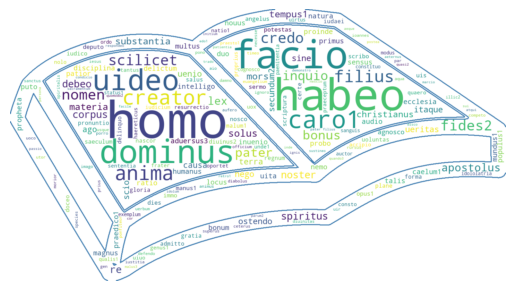

In [150]:
#On affiche notre wordcloud
from PIL import Image
im = Image.open('Wordcloud.png')
im

In [160]:
from nltk import FreqDist

# Nous cherchons à calculer la distribution de la fréquence des mots.
fdist = FreqDist(Lemme)

# Affichage des mots les plus fréquents ainsi que leurs fréquences respectives.
print(fdist.most_common(20))


[('christus', 1659), ('lex', 733), ('credo', 681), ('scilicet', 678), ('bonus', 672), ('nomen', 667), ('inquio', 666), ('fides2', 646), ('corpus', 639), ('apostolus', 593), ('noster', 587), ('sine', 512), ('debeo', 501), ('res', 491), ('terra', 483), ('mors', 478), ('materia', 446), ('solus', 441), ('substantia', 423), ('christianus', 421)]


In [161]:
#On crée des listes pour les futurs graphiques
Mots_courants= [fdist.most_common(20)[i][0] for i in range (20)]
Mots_courants

['christus',
 'lex',
 'credo',
 'scilicet',
 'bonus',
 'nomen',
 'inquio',
 'fides2',
 'corpus',
 'apostolus',
 'noster',
 'sine',
 'debeo',
 'res',
 'terra',
 'mors',
 'materia',
 'solus',
 'substantia',
 'christianus']

In [162]:
#On crée des listes pour les futurs graphiques
Nb_itérations=[fdist.most_common(20)[i][1] for i in range (20)]
Nb_itérations

[1659,
 733,
 681,
 678,
 672,
 667,
 666,
 646,
 639,
 593,
 587,
 512,
 501,
 491,
 483,
 478,
 446,
 441,
 423,
 421]

<function matplotlib.pyplot.show(close=None, block=None)>

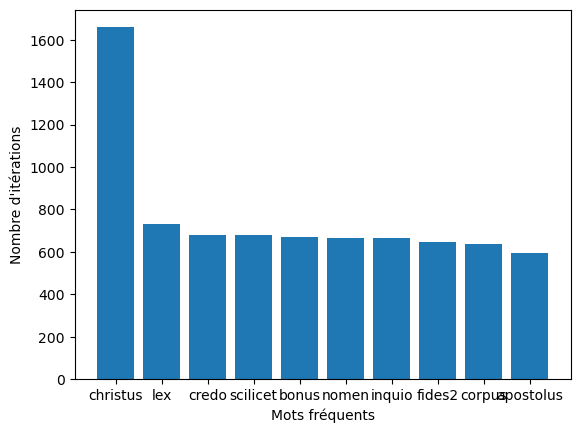

In [163]:
#On crée le graphique
plt.bar(Mots_courants[:10],Nb_itérations[:10])
plt.xlabel('Mots fréquents')
plt.ylabel(f"Nombre d'itérations")
plt.savefig('Distribution_Mots_Frequents.png', bbox_inches='tight')
plt.show

### LDA sur notre texte

In [155]:
#On réalise une LDA à partir de scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Suppression des stop-words à partir de ma propre base de stop-words
with open('StopwordsLatin_Tertu.txt', 'r') as stop_words_file:
    stop_words_Tertu = stop_words_file.read().splitlines()
    
Lemme_temporaire=[]
for word in Lemme:
    if word not in stop_words_Tertu:
        Lemme_temporaire.append(word)
Lemme=Lemme_temporaire


#On crée un dataframe Pandas qui contient une liste de nos mots lemmatisés
d = {'Tokens': Lemme}
corpus=pd.DataFrame(data=d)

# Initialisation de notre vecteur de comptage avec mes propres stop-words
count_vectorizer = CountVectorizer(stop_words=stop_words)
count_data = count_vectorizer.fit_transform(corpus.apply(lambda s: ' '.join(s)))

# Hyperparamètres de notre LDA
number_topics = 3 #On prend 5 sujets
number_words = 100 #On prend 10 mots représentatifs

#On initialise notre LDA
# avec n_components = nombres de sujets à extraire
lda = LatentDirichletAllocation(n_components=9, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0,
                                n_jobs = 1)
#On entraîne notre modèle
lda.fit(count_data)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, n_jobs=1, random_state=0)

In [156]:
# On affiche les sujets retenus par notre LDA avec leurs mots représentatifs
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nSujet #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)


Sujet #0:
nomen corpus bonus materia inquio res itaque noster apostolus scilicet mors sine magnus lex fides2 credo terra christianus debeo uenio audio ago propheta scio multus solus aduersus3 do delictum iudico praedico1 tempus1 tantus ratio uis diuinitas praesto1 locus auctor immo doceo nosco diabolus bonum iudaei sermo talis ponfiteor cor nemo praeceptum ostendo proprius nego colo2 duo manus1 primus sanctus nascor admitto disciplina mundus1 timeo nescio uita inuenio nolo sententia delinquo ecclesia cognosco iesus ordo gratia species potestas aeternus angelus natio1 nouus quando3 genus1 plane oculus secundum2 usque tot scribo aufero confirmo intelligo idololatria causa uiuifico uox ignis postea uetus iudicium

Sujet #1:
nomen inquio credo caelum1 scilicet debeo bonus fides2 lex sine tempus1 delictum itaque materia noster corpus terra nouus mors christianus intelligo nego sanctus ueritas inuenio do solus locus nemo magnus ostendo causa res uenio ecclesia natura disciplina secundum2 mu

In [157]:
#On génère des wordclouds pour mieux voir ce qui se passe :
from wordcloud import WordCloud
tf_feature_names = count_vectorizer.get_feature_names_out()

def wordcloud_lda(lda, tf_feature_names):
    fig, axs = plt.subplots(len(lda.components_) // 3 + 1, 3)
    for i in range(len(lda.components_)):
        corpus_lda = lda.components_[i]
        first_topic_words = [tf_feature_names[l] for l in corpus_lda.argsort()[:-50-1:-1]]
        k = i // 3
        j = (i - k*3)
        wordcloud = WordCloud(stopwords=stop_words, background_color="black",width = 2500, height = 1800)
        wordcloud = wordcloud.generate(" ".join(first_topic_words))
        axs[k][j].set_title("Wordcloud pour le \nsujet {}".format(i))
        axs[k][j].axis('off')
        axs[k][j].imshow(wordcloud)
        plt.savefig('Dirichlet.png',dpi=300)
        
  
    r = len(lda.components_) % 3
    [fig.delaxes(axs[len(lda.components_) // 3,k-1]) for k in range(r+1, 3+1) if r != 0]


In [158]:
%%capture capt
wc = wordcloud_lda(lda, tf_feature_names)

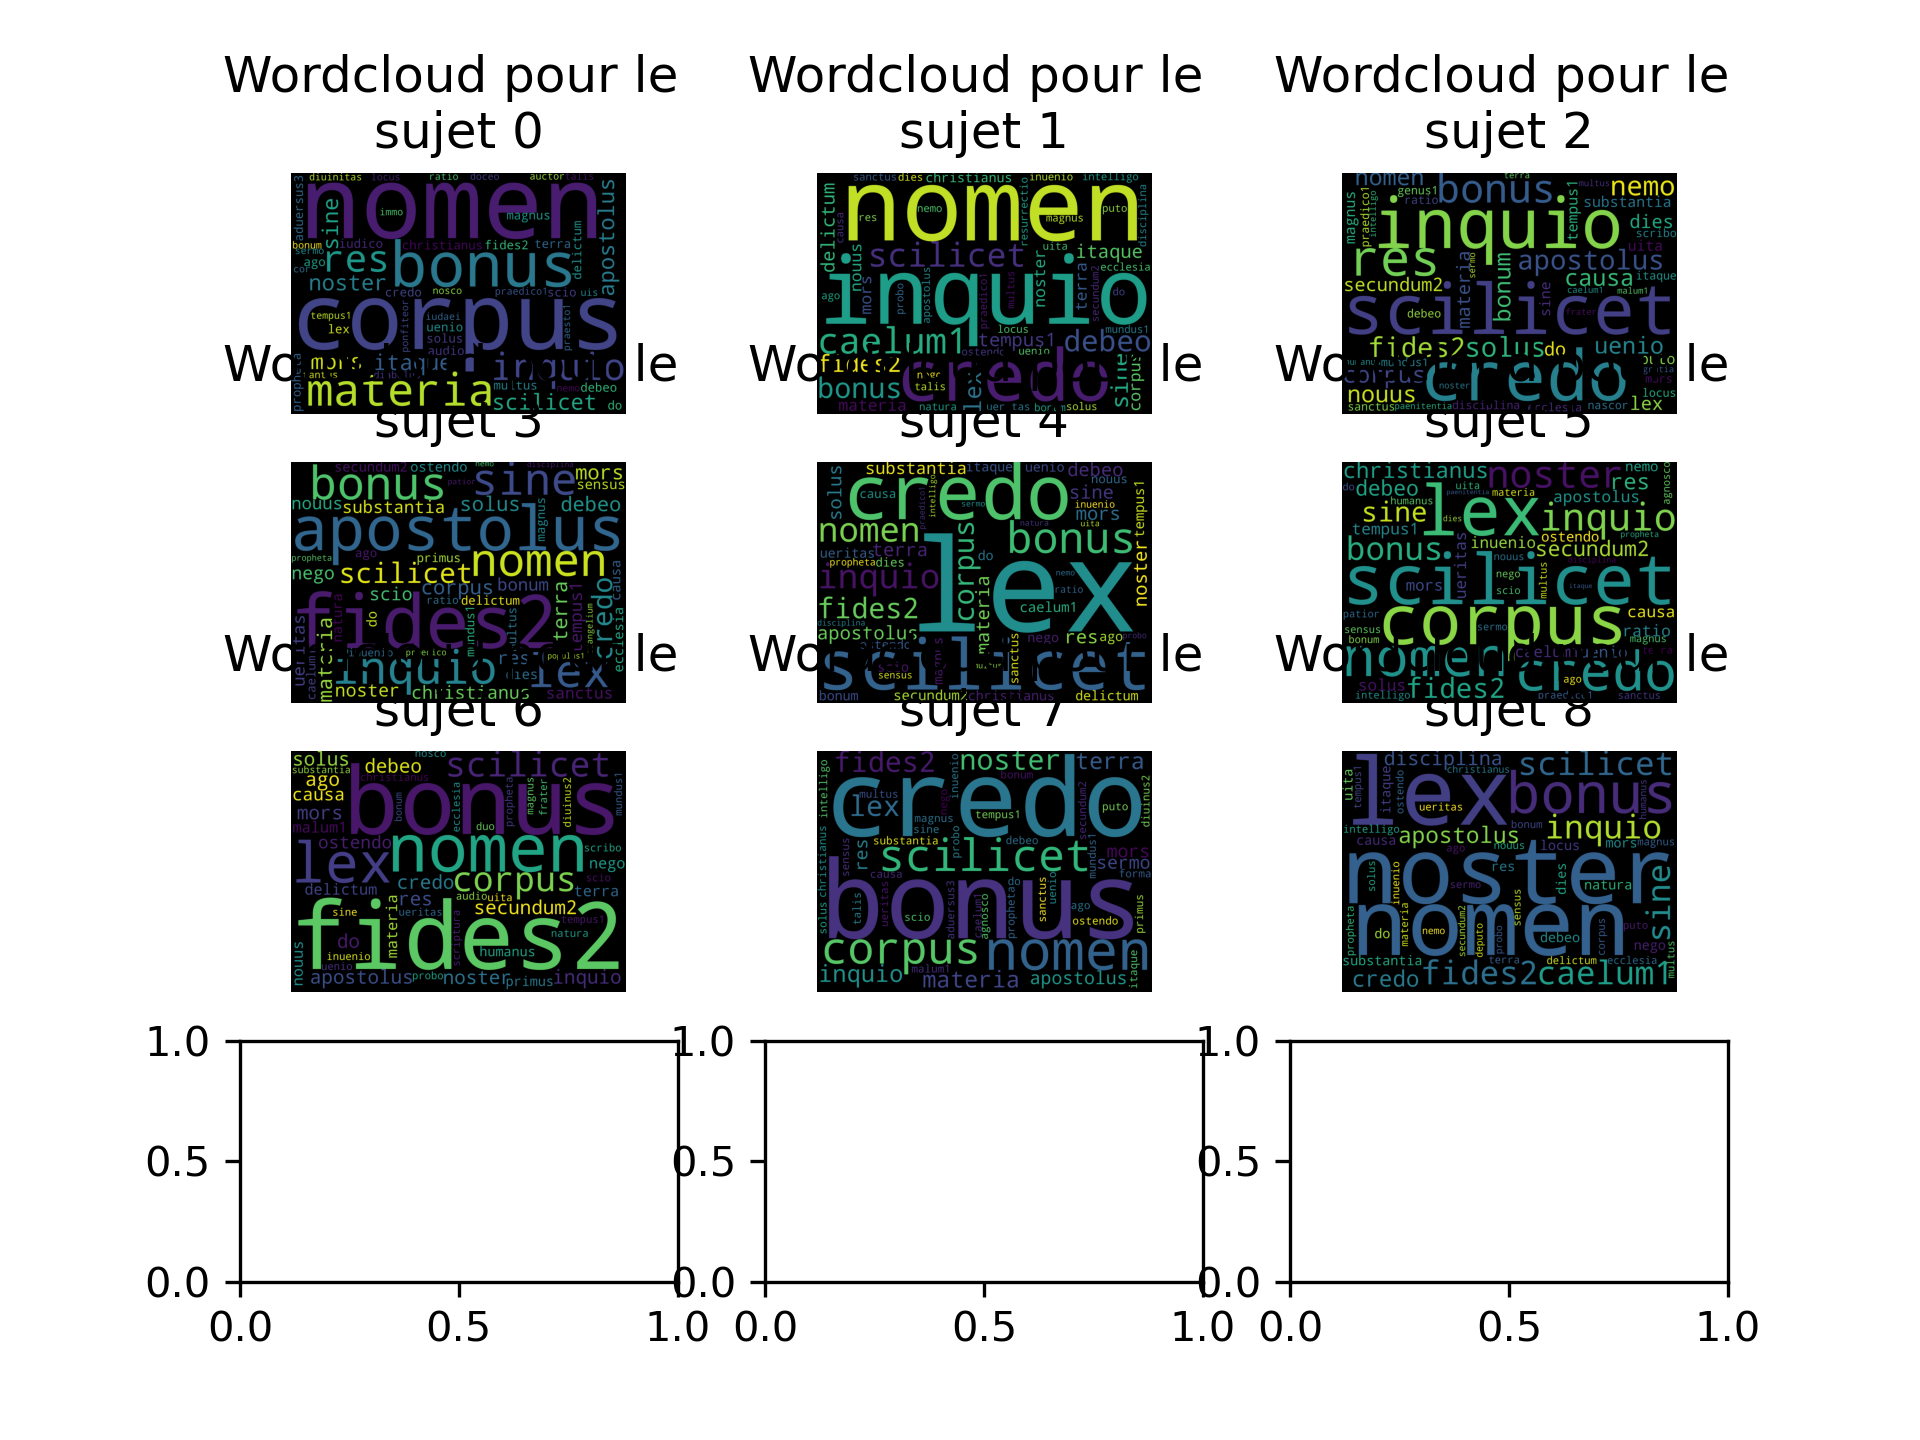

In [159]:
#On affiche le rendu
im = Image.open('Dirichlet.png')
im